<a href="https://colab.research.google.com/github/YuxingW/deep_learning/blob/main/hw3/part_c1_tensorflow_no_auto_differentiation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Tensorflow tensor datastructure without auto differentiation

In [25]:
%matplotlib inline
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers
import tensorflow as tf

#### 3d-2d non-linear data generation

In [26]:
n = 200
input_dim = 3
output_dim = 2

x = tf.Variable(tf.random.uniform(shape=(n, input_dim)))
# This is our weight matrix
weights_true = tf.Variable(tf.random.uniform(shape=(input_dim, output_dim)))
# This is our bias vector
bias_true = tf.Variable(tf.zeros(shape=(output_dim,)))

y = tf.matmul(tf.pow(x,2), weights_true) + tf.matmul(x, weights_true) + bias_true

print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y.shape}')

x: (200, 3), weights: (3, 2), bias: (2,), y: (200, 2)


#### Define model and loss

In [27]:
def compute_predictions(x):
  global w, b
  return tf.matmul(tf.pow(x,2), w) + tf.matmul(x, w) + b

In [28]:
def backward_update(x, gradient, lr):
  global w, b
  weights_gradient = tf.matmul(tf.transpose(x), gradient)
  bias_gradient = tf.reduce_sum(gradient) #gradient.sum()
  x_gradient = tf.matmul(gradient, tf.transpose(w))
  w = w  - lr * weights_gradient
  b = b - lr * bias_gradient

In [29]:
def compute_loss(y_true, y_pred):
  return tf.reduce_mean(tf.square(y_true - y_pred))

In [30]:
def compute_loss_gred(y_true, y_pred):
  n = y_true.shape[0]
  gradient = 2. * (y_pred - y_true) / n
  return gradient

####Initialize weights and bias for model

In [31]:
input_dim = 3
output_dim = 2

# This is our weight matrix
w = tf.Variable(tf.random.uniform(shape=(input_dim, output_dim)))
# This is our bias vector
b = tf.Variable(tf.zeros(shape=(output_dim,)))

####Do one step training

Initialize learning rate and optimizer

In [32]:
learning_rate = 1e-3
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)

In [33]:
y_pred = compute_predictions(x)

loss_value = compute_loss(y_pred, y)
print('loss ', loss_value)
gradient_from_loss = compute_loss_gred(y, y_pred)

backward_update(x, gradient_from_loss, learning_rate)

y_pred.shape

loss  tf.Tensor(0.28193256, shape=(), dtype=float32)


TensorShape([200, 2])

####Do training loop with eporches

Do not use GrandientTape computing gradients

In [34]:
def train_on_batch(x, y):
  global w, b
  y_pred = compute_predictions(x)
  loss_value = compute_loss(y_pred, y)
  gradient_from_loss = compute_loss_gred(y, y_pred)

  backward_update(x, gradient_from_loss, learning_rate)
  return y_pred, loss_value

In [35]:
for epoch in range(10000):
  global w, b
  y_pred, loss = train_on_batch(x, y)
  if epoch % 1000 ==0:
    print('Epoch %d: last batch loss = %.4f' % (epoch, float(loss)))

Epoch 0: last batch loss = 0.2807
Epoch 1000: last batch loss = 0.0403
Epoch 2000: last batch loss = 0.0201
Epoch 3000: last batch loss = 0.0101
Epoch 4000: last batch loss = 0.0051
Epoch 5000: last batch loss = 0.0026
Epoch 6000: last batch loss = 0.0013
Epoch 7000: last batch loss = 0.0007
Epoch 8000: last batch loss = 0.0003
Epoch 9000: last batch loss = 0.0002


####Plot the output and the real data using tsne

In [36]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

def plot_comparison(y_true, y_pred):
  #tsne = TSNE(n_components=2, perplexity=50, learning_rate=100, random_state=120)
  tsne = TSNE(n_components=2, random_state=0)
  yt_2d = tsne.fit_transform(y_true)
  yp_2d = tsne.fit_transform(y_pred)

  plt.figure(figsize=(6, 5))
  plt.scatter(yt_2d[:, 0], yt_2d[:, 1], c='b', label='y_true')
  plt.scatter(yp_2d[:, 0], yp_2d[:, 1], c='y', label='y_pred')
  plt.legend()
  plt.title('TSNE Y_True Y_Pred Comparison')
  plt.xlabel('t_SNE1')
  plt.xlabel('t_SNE2')
  plt.show()

def plot_distribution(x, y_true, y_pred):
  tsne = TSNE(n_components=1, random_state=0)
  x_2d = tsne.fit_transform(x)
  yt_2d = tsne.fit_transform(y_true)
  yp_2d = tsne.fit_transform(y_pred)

  plt.figure(figsize=(6, 5))
  plt.scatter(x_2d[:, 0], yt_2d[:, 0], c='b', label='y_true')
  plt.scatter(x_2d[:, 0], yp_2d[:, 0], c='y', label='y_pred')
  plt.legend()
  plt.title('TSNE Y_True Y_Pred Distribution with X')
  plt.show()

def plot_3d(x, y, y_pred=None):
  import matplotlib.pyplot as plt
  from mpl_toolkits.mplot3d import Axes3D
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(x[:, 0], x[:, 1], y, label='y_true')
  if y_pred is not None:
    ax.scatter(x[:, 0], x[:, 1], y_pred, label='y_pred')
  plt.legend()

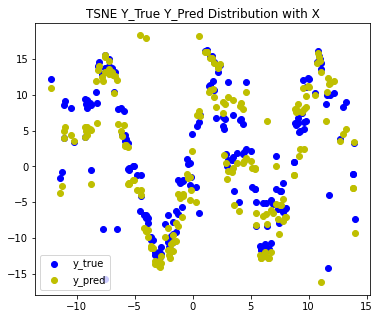

In [37]:
plot_distribution(x.numpy(), y.numpy(), y_pred.numpy())

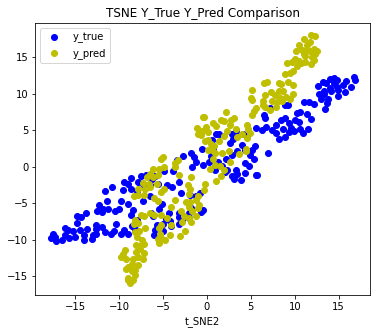

In [38]:
plot_comparison(y.numpy(), y_pred.numpy())

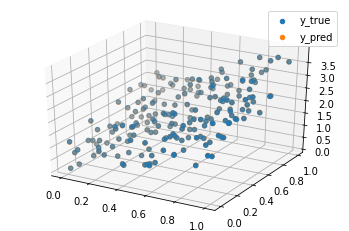

In [39]:
plot_3d(x, y[:, 0].numpy(), y_pred=y_pred[:, 0].numpy())

In [40]:
y_pred.shape

TensorShape([200, 2])

Though there is no auto differentiation, there is manual differentiation and back propagation, the y_pred is converging to y_true.